# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-13 00:56:17--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48a6399c4a648ed52666eabd10.dl.dropboxusercontent.com/cd/0/inline/CQ55GeU922Rn75esNCETNvdnXxDI9rVbe5SUtQ3t-EGKbKjQhn2PI390HOFnS03FCaWlMnoe2K2NUWOwh2uiIQC8CH88PdoQZsm-EemdSLJ-yskmGgMrNPcduGiIkVxaVuUBnEWipBHfe5G7Mw0ku-Jm/file# [following]
--2024-04-13 00:56:17--  https://uc48a6399c4a648ed52666eabd10.dl.dropboxusercontent.com/cd/0/inline/CQ55GeU922Rn75esNCETNvdnXxDI9rVbe5SUtQ3t-EGKbKjQhn2PI390HOFnS03FCaWlMnoe2K2NUWOwh2uiIQC8CH88PdoQZsm-EemdSLJ-yskmGgMrNPcduGiIkVxaVuUBnEWipBHfe5G7Mw0ku-Jm/file
Resolving uc48a6399c4a648ed52666eabd10.dl.dropboxusercontent.com (uc48a6399c4a648ed52666eabd10.dl.dropboxusercontent.com)... 162.125.13.15, 2620

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
import pandas as pd

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Optionally, verify that there are no more missing values
print(df.isnull().sum())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Get a brief description of the dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Get information about the dataset
print(df.info())

# Get descriptive statistics of the dataset
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


In [4]:
import pandas as pd

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Remove the target column (assuming 'MEDV' is the target)
features_df = df.drop('MEDV', axis=1)

# Convert the DataFrame of features to a NumPy array
features_array = features_df.to_numpy()

# Print the first 5 rows of the array to verify
print(features_array[:5])


[[6.32000000e-03 1.80000000e+01 2.31000000e+00 0.00000000e+00
  5.38000000e-01 6.57500000e+00 6.52000000e+01 4.09000000e+00
  2.96000000e+02 1.53000000e+01 3.96900000e+02 4.98000000e+00]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 6.42100000e+00 7.89000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.96900000e+02 9.14000000e+00]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 7.18500000e+00 6.11000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.92830000e+02 4.03000000e+00]
 [3.23700000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 6.99800000e+00 4.58000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.94630000e+02 2.94000000e+00]
 [6.90500000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 7.14700000e+00 5.42000000e+01 6.06220000e+00
  2.22000000e+02 1.87000000e+01 3.96900000e+02 1.27154321e+01]]


# Preprocessing

In [6]:
import pandas as pd
import numpy as np

# Assuming the DataFrame is loaded and named as df
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Drop the target column 'MEDV'
features_df = df.drop('MEDV', axis=1)

# Convert the DataFrame of features into a NumPy array
features_array = features_df.to_numpy()

# Display the type of the array
print(type(features_array))

# Print the first 5 rows of the array
np.set_printoptions(precision=6, suppress=True)  # Set precision for display
print(features_array[:5])


<class 'numpy.ndarray'>
[[  0.00632   18.         2.31       0.         0.538      6.575
   65.2        4.09     296.        15.3      396.9        4.98    ]
 [  0.02731    0.         7.07       0.         0.469      6.421
   78.9        4.9671   242.        17.8      396.9        9.14    ]
 [  0.02729    0.         7.07       0.         0.469      7.185
   61.1        4.9671   242.        17.8      392.83       4.03    ]
 [  0.03237    0.         2.18       0.         0.458      6.998
   45.8        6.0622   222.        18.7      394.63       2.94    ]
 [  0.06905    0.         2.18       0.         0.458      7.147
   54.2        6.0622   222.        18.7      396.9       12.715432]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

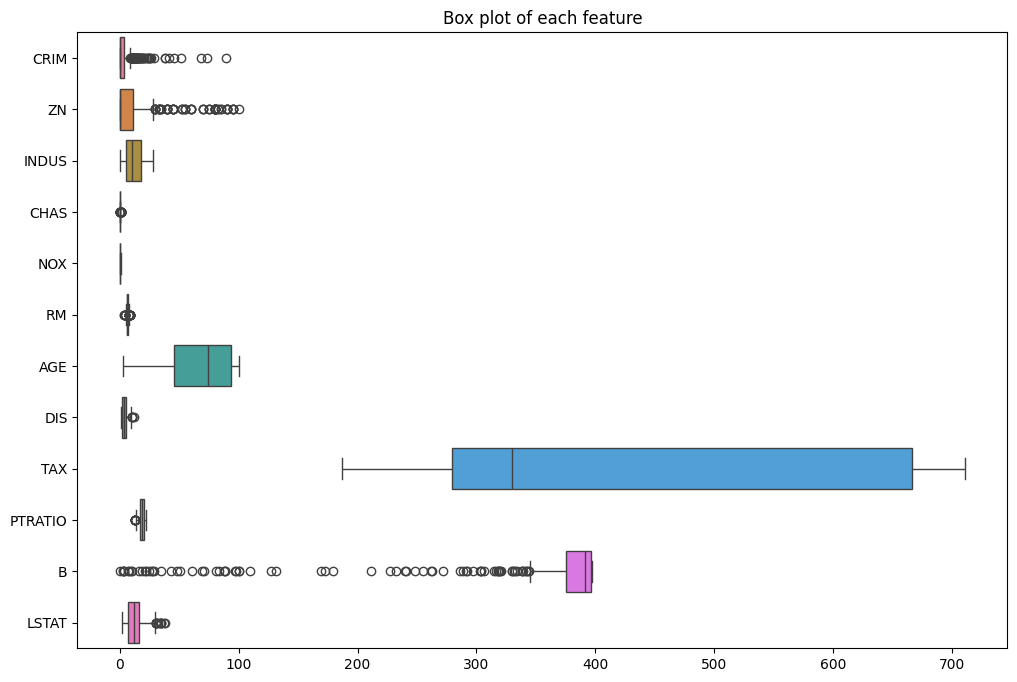

Scaled data preview:
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.422328  0.296443 -1.311010 -0.279851 -0.144217  0.413672 -0.121059   
1 -0.419870 -0.489639 -0.599771 -0.279851 -0.740262  0.194274  0.378716   
2 -0.419872 -0.489639 -0.599771 -0.279851 -0.740262  1.282714 -0.270627   
3 -0.419277 -0.489639 -1.330435 -0.279851 -0.835284  1.016303 -0.828770   
4 -0.414981 -0.489639 -1.330435 -0.279851 -0.835284  1.228577 -0.522338   

        DIS       TAX   PTRATIO         B         LSTAT  
0  0.140214 -0.666608 -1.459000  0.441052 -1.104146e+00  
1  0.557160 -0.987329 -0.303094  0.441052 -5.103527e-01  
2  0.557160 -0.987329 -0.303094  0.396427 -1.239748e+00  
3  1.077737 -1.106115  0.113032  0.416163 -1.395333e+00  
4  1.077737 -1.106115  0.113032  0.441052 -2.535550e-16  


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Drop the target column 'MEDV' and keep the features
features_df = df.drop('MEDV', axis=1)

# Generate box plots for each column to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=features_df, orient="h")
plt.title('Box plot of each feature')
plt.show()

# After visualizing the outliers, apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Optionally, you might want to check the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=features_df.columns)
print("Scaled data preview:")
print(scaled_df.head())


add polynomial features to increase model complexity!



Polynomial Features head:
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.422328  0.296443 -1.311010 -0.279851 -0.144217  0.413672 -0.121059   
1 -0.419870 -0.489639 -0.599771 -0.279851 -0.740262  0.194274  0.378716   
2 -0.419872 -0.489639 -0.599771 -0.279851 -0.740262  1.282714 -0.270627   
3 -0.419277 -0.489639 -1.330435 -0.279851 -0.835284  1.016303 -0.828770   
4 -0.414981 -0.489639 -1.330435 -0.279851 -0.835284  1.228577 -0.522338   

        DIS       TAX   PTRATIO  ...     TAX^2  TAX PTRATIO     TAX B  \
0  0.140214 -0.666608 -1.459000  ...  0.444367     0.972582 -0.294009   
1  0.557160 -0.987329 -0.303094  ...  0.974820     0.299254 -0.435464   
2  0.557160 -0.987329 -0.303094  ...  0.974820     0.299254 -0.391404   
3  1.077737 -1.106115  0.113032  ...  1.223491    -0.125027 -0.460324   
4  1.077737 -1.106115  0.113032  ...  1.223491    -0.125027 -0.487854   

      TAX LSTAT  PTRATIO^2  PTRATIO B  PTRATIO LSTAT       B^2       B LSTAT  \
0  7

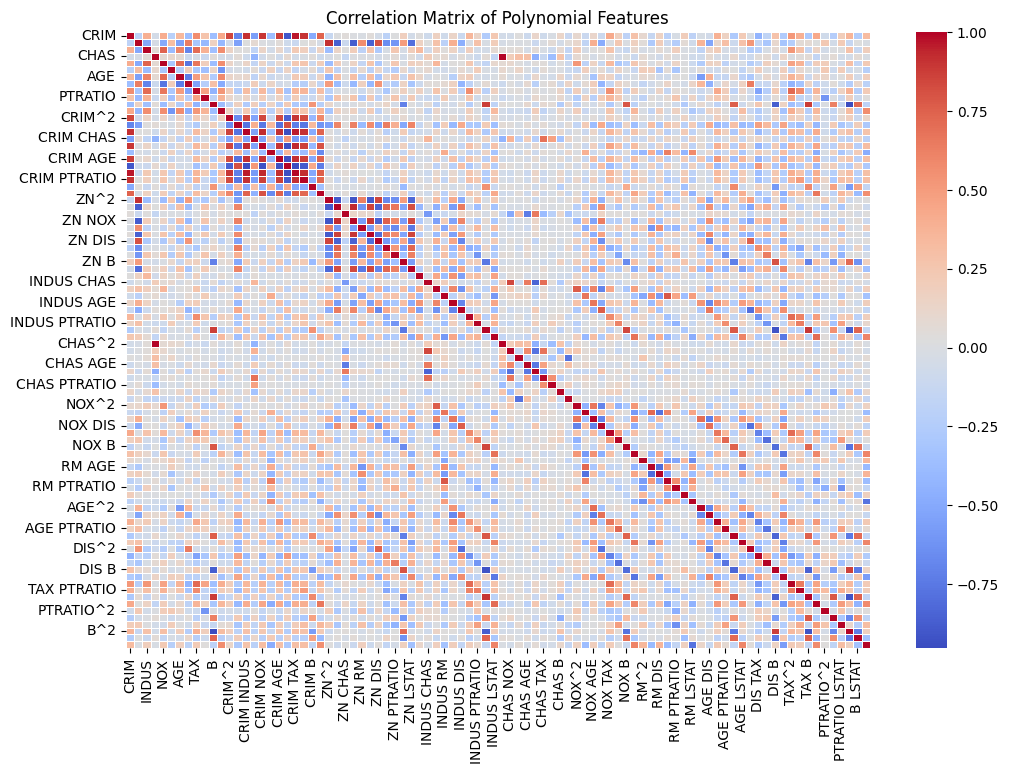

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Drop the target column 'MEDV' and keep the features
features_df = df.drop('MEDV', axis=1)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Create polynomial features
# Typically, degree=2 is a good starting point
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_scaled)

# Convert the array back to a DataFrame for easier manipulation
features_poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names_out(features_df.columns))

# Display the first few rows of the new features to verify
print("Polynomial Features head:")
print(features_poly_df.head())

# Optionally, visualize correlations or distributions of new features
plt.figure(figsize=(12, 8))
sns.heatmap(features_poly_df.corr(), annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Polynomial Features')
plt.show()


Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [10]:
import pandas as pd

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Extract the target column 'MEDV' into a new NumPy array
y = df['MEDV'].to_numpy()

# Print the first few entries of the array to verify
print("First few entries of the target array y:")
print(y[:5])


First few entries of the target array y:
[24.  21.6 34.7 33.4 36.2]




Split the dataset into two parts such that the training set contains 80% of the samples.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Drop the target column 'MEDV' and keep the features
features_df = df.drop('MEDV', axis=1)
# Extract the target column 'MEDV'
y = df['MEDV'].to_numpy()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_poly, y, test_size=0.20, random_state=42)

# Optionally, print the shapes of the outputs to verify the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (404, 90)
Test set shape: (102, 90)


# Training


Fit a linear regressor to the data. (Use sklearn)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/HousingData.csv'
df = pd.read_csv(file_path)

# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Drop the target column 'MEDV' and keep the features
features_df = df.drop('MEDV', axis=1)
# Extract the target column 'MEDV'
y = df['MEDV'].to_numpy()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_poly, y, test_size=0.20, random_state=42)

# Create a linear regression object
linear_regressor = LinearRegression()

# Fit the linear regression model to the training data
linear_regressor.fit(X_train, y_train)

# Predict the training set results (optional, for initial evaluation)
y_train_pred = linear_regressor.predict(X_train)

# Calculate and print the performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("Training Mean Squared Error (MSE):", mse_train)
print("Training R2 Score:", r2_train)


Training Mean Squared Error (MSE): 6.65783903781899
Training R2 Score: 0.9233615957926449


Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn: [ 2.615432  0.823937  0.271363 -3.48212  -1.294091  3.445857 -1.219431
 -1.81708  -1.35705  -0.762724  0.094128 -3.267901  0.188816 -2.122936
  3.272017  2.995929 -2.335838  0.347631  0.208742  2.218835 -2.333224
 -2.044479  0.007418  1.193221 -0.084113  0.101386  0.27471  -2.780211
 -0.152798  0.761588 -1.086307  2.971249 -0.26864  -3.022138 -1.607046
  1.313212 -0.311014 -0.510198  1.282525  1.32809   1.382054 -0.650905
 -1.06081   0.772225 -0.506351  1.37178  -1.089496 -0.950138 -0.445437
 -1.696269  0.547158 -0.188582  0.006919 -0.471226 -0.37917  -1.240934
  0.376741  3.634088  1.956699 -2.076282 -0.487584  0.533154  0.734805
 -0.476721  0.1448   -2.030858 -1.1822   -0.462945  0.696662  0.062145
  0.435303 -0.672892  0.37224  -1.125191 -1.176508  2.24181  -2.159877
 -0.533157  0.442541  0.74074  -0.118015  4.208879 -1.010954 -2.486621
 -0.486519  0.104891  0.076163 -0.329743  0.163161  1.402554]


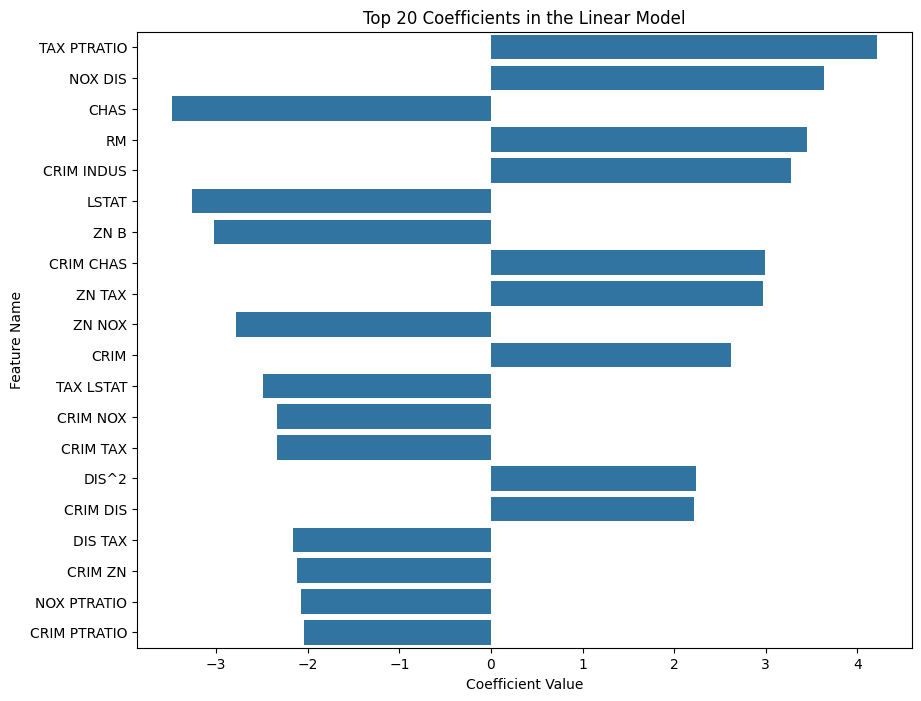

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Create a linear regression object and fit it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Extract the coefficients
coefficients = linear_regressor.coef_

# Create a DataFrame for easier handling of the coefficients
features_names = poly.get_feature_names_out(features_df.columns)  # Ensure you have this from the PolynomialFeatures
coeff_df = pd.DataFrame({'Feature': features_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of coefficients for better visualization
coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)


# Create a linear regression object and fit it
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Extract the coefficients
coefficients = linear_regressor.coef_

# Print the coefficients in the requested format
print("Coefficients of the variables in the sklearn:", coefficients)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(20))  # Visualize top 20 coefficients for clarity
plt.title('Top 20 Coefficients in the Linear Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()


Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the model is named `linear_regressor` and has been fitted to `X_train` and `y_train`
# Predict the training data
y_train_pred = linear_regressor.predict(X_train)

# Calculate R² score
r2_train = r2_score(y_train, y_train_pred)
print("R² score on the training dataset:", r2_train)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) on the training dataset:", mse_train)


R² score on the training dataset: 0.9233615957926449
Mean Squared Error (MSE) on the training dataset: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [24]:
# Predict the target values for the testing set
y_test_pred = linear_regressor.predict(X_test)

# Display the first few predictions to verify
print("First few predictions on the test set:")
print(y_test_pred[:5])


First few predictions on the test set:
[26.607605 39.622143 18.714019 21.006275 15.369321]


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


lasso_regressor = Lasso(alpha=0.5)
# Fit the model to the training data
lasso_regressor.fit(X_train, y_train)

# Predict the training set (optional, to check performance on training set)
y_train_pred_lasso = lasso_regressor.predict(X_train)

# Calculate R² score and Mean Squared Error (MSE) for the training set
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)

# Print the R² score and MSE
print("Lasso R² score on the training dataset:", r2_train_lasso)
print("Lasso Mean Squared Error (MSE) on the training dataset:", mse_train_lasso)

# Print coefficients
print("Coefficients after Lasso regularization:", lasso_regressor.coef_)


Lasso R² score on the training dataset: 0.8171286694481938
Lasso Mean Squared Error (MSE) on the training dataset: 15.88665494849732
Coefficients after Lasso regularization: [-0.        0.       -0.        0.       -0.        2.710446 -0.
 -0.       -0.175518 -0.879198  0.       -3.615716 -0.091722  0.
 -0.        0.       -0.        0.       -0.        0.       -0.
 -0.       -0.       -0.        0.        0.        0.        0.
  0.       -0.       -0.        0.        0.       -0.       -0.
  0.        0.       -0.       -0.        0.        0.        0.
 -0.        0.       -0.        0.216575 -0.       -0.        0.
 -0.        0.097128  0.        0.       -0.       -0.207983 -0.148511
 -0.        0.       -0.       -0.        0.       -0.        0.756227
 -0.        0.       -0.851999 -0.597207  0.       -0.        0.
  0.       -0.       -0.       -0.       -0.       -0.        0.
  0.       -0.        0.269616  0.        0.       -0.       -0.835317
  0.       -0.       -0.    

Get the coefficients of the variables and visualize it.

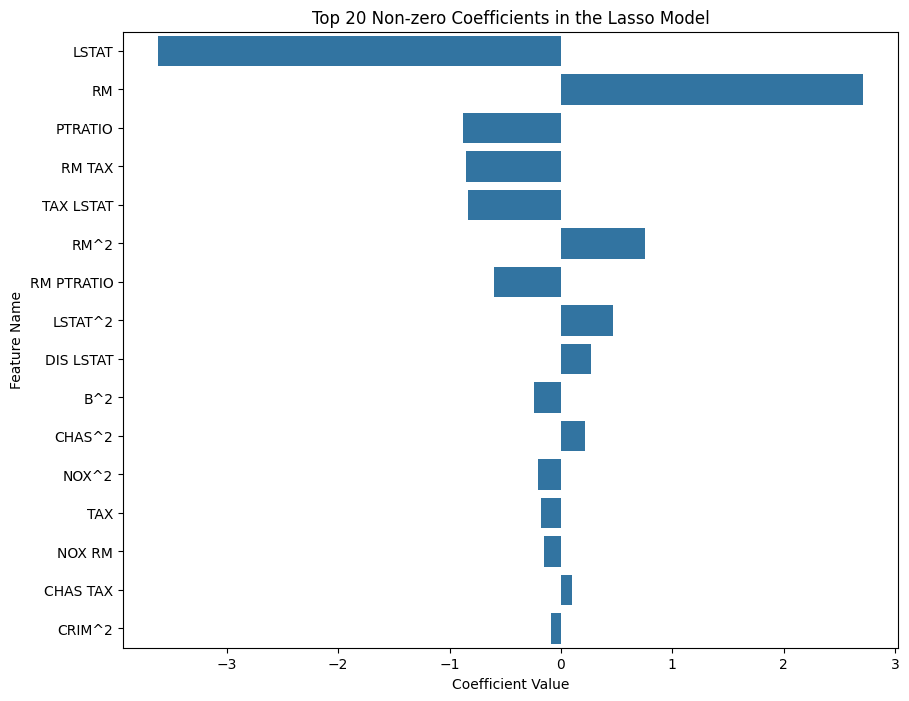

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the coefficients
coefficients_lasso = lasso_regressor.coef_

# Get feature names from the polynomial features
# Assuming `features_df` and `poly` are defined from previous steps
feature_names = poly.get_feature_names_out(features_df.columns)

# Create a DataFrame for the coefficients for easier handling
coeff_df_lasso = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_lasso})

# Filter out the features with a coefficient of zero for a clearer visualization
coeff_df_lasso = coeff_df_lasso[coeff_df_lasso['Coefficient'] != 0]

# Sort the DataFrame by the absolute values of coefficients for better visualization
coeff_df_lasso = coeff_df_lasso.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_lasso.head(20))  # Visualize top 20 coefficients for clarity
plt.title('Top 20 Non-zero Coefficients in the Lasso Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()


1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.
  
   وقتی از نرمال‌سازی L1 (Lasso) در مدل‌های رگرسیون استفاده می‌شود، تأثیرات قابل توجهی بر توزیع وزن ضرایب مدل وجود دارد و همچنین نحوه تأثیر پارامتر نرمال‌سازی (آلفا) بر این تأثیرات را می‌توان مشاهده کرد. در اینجا برخی از مشاهدات و توضیحات برای هر کدام آورده شده است:

### 1. مشاهدات در مورد توزیع وزن با نرمال‌سازی L1:

- **تخلخل**: نرمال‌سازی L1 معمولاً منجر به تولید یک مدل تخلخلی (sparse) می‌شود، به این معنی که ضرایب ویژگی‌های کم اهمیت را دقیقاً به صفر می‌رساند. این عمل به عنوان یک شکل از انتخاب ویژگی خودکار عمل می‌کند، که به کاهش پیچیدگی مدل و جلوگیری از بیش‌برازش کمک می‌کند.

- **اندازه**: ضرایبی که صفر نشده‌اند معمولاً دارای مقادیر مطلق کوچک‌تری نسبت به آن‌هایی هستند که در یک مدل بدون نرمال‌سازی هستند. این به دلیل این است که جریمه L1 مدل را تشویق می‌کند که نه تنها تعداد ویژگی‌ها را کاهش دهد، بلکه ضرایب را نیز در اصطلاحات مطلق کوچک نگه دارد.

- **تجارت بین سوگیری و واریانس**: با افزودن نرمال‌سازی، شما سوگیری را به مدل اضافه می‌کنید با مزیت کاهش واریانس. ممکن است مدل کمی بدتر روی داده‌های آموزشی عمل کند (سوگیری بیشتر) اما بهتر روی داده‌های دیده نشده عمل کند (واریانس پایین‌تر).

### 2. تأثیرات متفاوت مقادیر پارامتر نرمال‌سازی (آلفا):

- **افزایش `آلفا`**:
  - **تخلخل بیشتر**: با افزایش `آلفا`، جریمه برای ضرایب غیر صفر شدیدتر می‌شود، که باعث می‌شود مدل تخلخل بیشتری را حتی بیشتر ترجیح دهد. این منجر به صفر شدن ضرایب بیشتری می‌شود.
  - **خطر کم‌برازش**: در مقادیر بسیار بالای `آلفا`، ممکن است مدل خیلی ساده شود، احتمالاً برخی ا

ز پیش‌بین‌های مهم را نادیده بگیرد. این می‌تواند منجر به کم‌برازش شود، جایی که مدل حتی روی داده‌های آموزشی هم خوب عمل نمی‌کند.

- **کاهش `آلفا`**:
  - **تخلخل کمتر**: مقادیر پایین‌تر `آلفا` تأثیر شرط نرمال‌سازی را کاهش می‌دهد، که منجر به کاهش تعداد ضرایب کاهش یافته به صفر می‌شود. این ممکن است مفید باشد اگر مدل واقعی زیربنایی واقعاً پیچیده است و بیشتر ویژگی‌ها مرتبط هستند.
  - **خطر بیش‌برازش**: اگر `آلفا` خیلی پایین باشد، تأثیر نرمال‌سازی ممکن است ناچیز شود، که منجر به بیش‌برازش می‌شود، به‌ویژه اگر تعداد ویژگی‌ها نسبت به تعداد مشاهدات زیاد باشد.

### نکات عملی:

- **انتخاب مدل**: از نرمال‌سازی متقاطع (مانند `LassoCV` در scikit-learn) برای یافتن یک مقدار بهینه `آلفا` استفاده کنید. این تعادل پیچیدگی مدل را با عملکرد آن تنظیم می‌کند، سطح تخلخل را تنظیم می‌کند تا معیارهای اعتبارسنجی را بهینه کند.

- **اهمیت ویژگی**: پس از آموزش با Lasso، بررسی کنید که کدام ویژگی‌ها ضرایب غیر صفر دارند تا درک کنید کدام متغیرها در پیش‌بینی نتیجه بیشترین تأثیر را دارند.

- **اعتبارسنجی مدل**: همیشه پیش‌بینی‌های مدل Lasso را در مقابل یک مجموعه آزمایشی نگهداری شده یا از طریق نرمال‌سازی متقاطع بررسی کنید تا اطمینان حاصل کنید که `آلفا` انتخاب شده تعادل خوبی بین سوگیری و واریانس فراهم می‌کند.

به طور خلاصه، نرمال‌سازی L1 تأثیر عمیقی بر پیچیدگی مدل و انتخاب ویژگی دارد، با پارامتر نرمال‌سازی `آلفا` نقش کلیدی در تعیین تعادل بین کم‌برازش و بیش‌برازش ایفا می‌کند. با تنظیم `آلفا`، شما می‌توانید مدل را به سمت سطح مناسبی از سادگی هدایت کنید ت

ا به بهترین شکل در داده‌های دیده نشده عمل کند.


Get the score value on train *dataset*


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the training data using the Lasso model
y_train_pred_lasso = lasso_regressor.predict(X_train)

# Calculate R² score for the training dataset
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
print("Lasso R² score on the training dataset:", r2_train_lasso)

# Calculate Mean Squared Error (MSE) for the training dataset
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
print("Lasso Mean Squared Error (MSE) on the training dataset:", mse_train_lasso)


Lasso R² score on the training dataset: 0.8171286694481938
Lasso Mean Squared Error (MSE) on the training dataset: 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [27]:

# Predict the target values for the testing set
y_test_pred_lasso = lasso_regressor.predict(X_test)

# Display the first few predictions to verify
print("First few predictions on the test set:")
print(y_test_pred_lasso[:5])


First few predictions on the test set:
[25.015536 32.021705 16.564317 23.675458 17.13464 ]


# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


ridge_regressor = Ridge(alpha=10.0)

# Fit the model to the training data
ridge_regressor.fit(X_train, y_train)

# Predict the training set
y_train_pred_ridge = ridge_regressor.predict(X_train)

# Calculate R² score and Mean Squared Error (MSE) for the training set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)

# Print the R² score and MSE
print("Ridge R² score on the training dataset:", r2_train_ridge)
print("Ridge Mean Squared Error (MSE) on the training dataset:", mse_train_ridge)

# Print coefficients
print("Coefficients after Ridge regularization:", ridge_regressor.coef_)


Ridge R² score on the training dataset: 0.9143940529441624
Ridge Mean Squared Error (MSE) on the training dataset: 7.436880009084564
Coefficients after Ridge regularization: [ 0.059122  0.511164 -0.284676 -0.324554 -0.858277  3.308883 -1.159037
 -1.595933 -0.531802 -0.910428  0.428282 -2.940779  0.160871 -0.251712
  0.627541  1.6053   -1.09009   0.198573 -0.214662  0.913153 -0.333296
 -0.3707   -0.068544  0.532275  0.134513  0.041745  0.214028 -0.197531
 -0.138184  0.111281 -0.411187  0.693569 -0.053492 -0.331534 -0.652391
  0.657745  0.00626   0.175105  0.56882   0.844059  0.752539 -0.017354
 -0.741384  0.385413 -0.848926  0.447746 -0.956053 -0.87634  -0.117805
 -0.842453  0.773712 -0.059867 -0.052823 -0.561291 -0.350544 -1.108249
 -0.289205  0.95797   0.161939 -0.72744  -0.230246  0.596784  0.610078
 -0.355477  0.255073 -1.390823 -1.307773 -0.345068  0.439357  0.187686
  0.336403  0.120717  0.17083  -0.888896 -0.934345  1.101171 -0.552297
 -0.019544 -0.25679   0.787149  0.62433   1.9

Get the coefficients of the variables and visualize it.

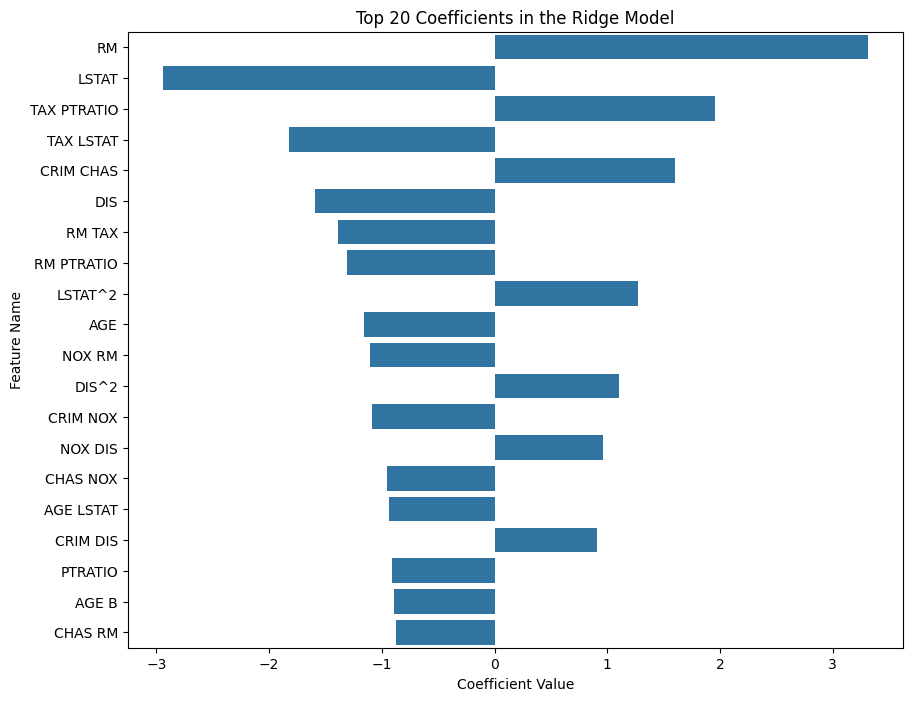

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the coefficients
coefficients_ridge = ridge_regressor.coef_

# Get feature names from the polynomial features
# Assuming `features_df` and `poly` are defined from previous steps
feature_names = poly.get_feature_names_out(features_df.columns)

# Create a DataFrame for the coefficients for easier handling
coeff_df_ridge = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_ridge})

# Sort the DataFrame by the absolute values of coefficients for better visualization
coeff_df_ridge = coeff_df_ridge.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_ridge.head(20))  # Visualize top 20 coefficients for clarity
plt.title('Top 20 Coefficients in the Ridge Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()


Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here

Get the score value on train *dataset*

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the training data using the Ridge model
y_train_pred_ridge = ridge_regressor.predict(X_train)

# Calculate R² score for the training dataset
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
print("Ridge R² score on the training dataset:", r2_train_ridge)

# Calculate Mean Squared Error (MSE) for the training dataset
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
print("Ridge Mean Squared Error (MSE) on the training dataset:", mse_train_ridge)


Ridge R² score on the training dataset: 0.9143940529441624
Ridge Mean Squared Error (MSE) on the training dataset: 7.436880009084564


Predict the value of "y" for each "x" belonging to the "testing" set



In [32]:

# Predict the target values for the testing set
y_test_pred_ridge = ridge_regressor.predict(X_test)

# Display the first few predictions to verify
print("First few predictions on the test set:")
print(y_test_pred_ridge[:5])


First few predictions on the test set:
[26.64874  37.58387  19.276576 21.941972 15.30281 ]


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [33]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Example placeholders for model performance metrics
# You should replace these with actual calculations from your models

# Basic Linear Regression Metrics
r2_train_linear = r2_score(y_train, linear_regressor.predict(X_train))
rmse_train_linear = sqrt(mean_squared_error(y_train, linear_regressor.predict(X_train)))
r2_test_linear = r2_score(y_test, linear_regressor.predict(X_test))
rmse_test_linear = sqrt(mean_squared_error(y_test, linear_regressor.predict(X_test)))

# Lasso Regression Metrics
r2_train_lasso = r2_score(y_train, lasso_regressor.predict(X_train))
rmse_train_lasso = sqrt(mean_squared_error(y_train, lasso_regressor.predict(X_train)))
r2_test_lasso = r2_score(y_test, lasso_regressor.predict(X_test))
rmse_test_lasso = sqrt(mean_squared_error(y_test, lasso_regressor.predict(X_test)))

# Ridge Regression Metrics
r2_train_ridge = r2_score(y_train, ridge_regressor.predict(X_train))
rmse_train_ridge = sqrt(mean_squared_error(y_train, ridge_regressor.predict(X_train)))
r2_test_ridge = r2_score(y_test, ridge_regressor.predict(X_test))
rmse_test_ridge = sqrt(mean_squared_error(y_test, ridge_regressor.predict(X_test)))

# Creating a DataFrame for the summary
metrics_summary = pd.DataFrame({
    'Model': ['Linear', 'Lasso', 'Ridge'],
    'R² Train': [r2_train_linear, r2_train_lasso, r2_train_ridge],
    'RMSE Train': [rmse_train_linear, rmse_train_lasso, rmse_train_ridge],
    'R² Test': [r2_test_linear, r2_test_lasso, r2_test_ridge],
    'RMSE Test': [rmse_test_linear, rmse_test_lasso, rmse_test_ridge]
})

# Display the DataFrame
print(metrics_summary)


    Model  R² Train  RMSE Train   R² Test  RMSE Test
0  Linear  0.923362    2.580279  0.752882   4.257003
1   Lasso  0.817129    3.985807  0.778718   4.028328
2   Ridge  0.914394    2.727064  0.793955   3.887163


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.
        